## Phase1: Predicting Model

In [13]:
import pandas as pd
import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [17]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


## Data Wrangling

In [19]:
# Null Values
data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes Test Result    0
dtype: int64

In [16]:
# Comment
for col in data.columns:
    data[col] = [int(x) for x in data[col]]

### Diabetes Case Indicator
**"Diabetes Test Result"** is revealed in data["Diabetes_012"] column by following values:
<br> *0 :"No_Diabetes", 1:"Pre_Diabetes", 2:"Diabetes"

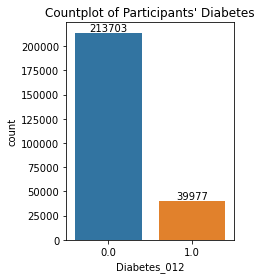

In [27]:
# Diabetes vs PreDiabetes cases
Q = "Diabetes_012"
df0 = data


plt.figure(figsize = (3 , 4))
ax = sns.countplot(x=df0[Q], data = df0)
plt.title("Countplot of Participants' Diabetes")

for i in ax.containers:
    ax.bar_label(i,),

**Conclusion**: AS this was found we have a districted imbalanced values for Diabetes results. This fact leads our case study and define who to treat with our challenge.
Action: To prevent the complexities of imblanced data, it shall be necessary to consider all Pre_Diabetes to Diabetes cases in on basket as Diabetes. (In Logistic Regression, regarding the weak predicting performace of model, I make this decision.) so all Diabetes and Pre_Diabetes cases will be taken in one cases.

In [23]:
# deleting prediabetes 
data.Diabetes_012[data.Diabetes_012 == 2] = 1
data.Diabetes_012.unique()

array([0., 1.])

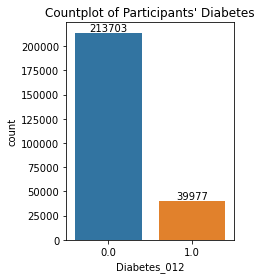

In [28]:
plt.figure(figsize = (3 , 4))
ax = sns.countplot(x=df0[Q], data = df0)
plt.title("Countplot of Participants' Diabetes")

for i in ax.containers:
    ax.bar_label(i,),

## Correlation between diabetes and other parameters

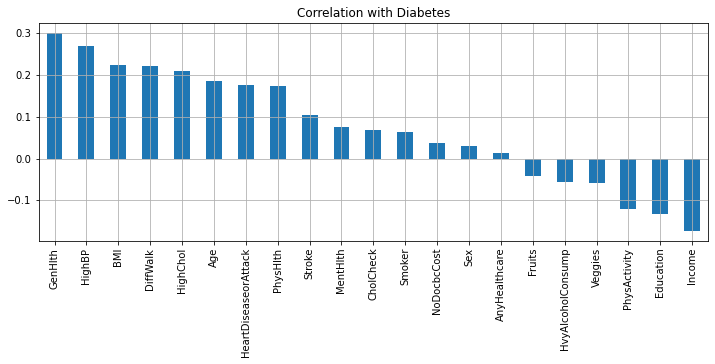

In [29]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(12, 4)
, title="Correlation with Diabetes");
#df.drop('Diabetes', axis=1).corrwith(df.Diabetes).sort_values(ascending=False)

I stole the above correlation graph from your notebook! It is excellent.

Because the massive difference between Income in US and other countries (*including Iran*), among these parameters **Income** is going to be dropped.

In [30]:
data = data.drop('Income', axis = 1)

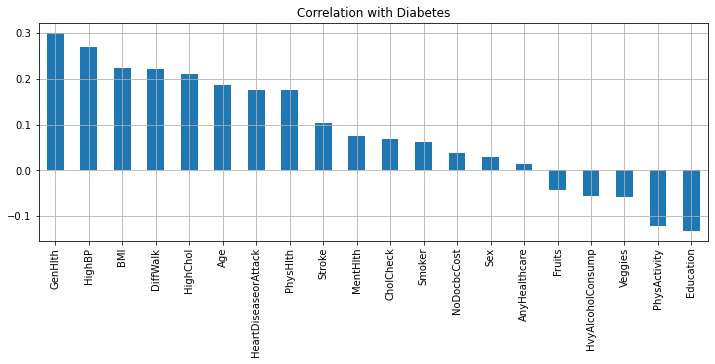

In [31]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(12, 4)
, title="Correlation with Diabetes");
#df.drop('Diabetes', axis=1).corrwith(df.Diabetes).sort_values(ascending=False)

## Training Model
The **LGBMClassifier** had one of the best performances among all applyed methods. so this model will be selected as classifier for this projecs.

In [32]:
x = data.drop('Diabetes_012', axis = 1)
y = data['Diabetes_012']

In [33]:
from sklearn.model_selection import train_test_split

x_train,xx,y_train,yy = train_test_split(x,y,test_size = 0.8,random_state = 23) 
#x_test,x_val,y_test,y_val = train_test_split(xx,yy,test_size = 0.5,random_state = 23) 

In [34]:
clf = lgb.LGBMClassifier(boosting_type= 'gbdt', objective = 'binary',learning_rate= 0.07, n_estimators= 4000, reg_lambda = 2, 
                         max_depth = 5 , num_leaves = 20)
clf.fit(x_train,y_train)
train_predict = clf.predict(x_train)
print (metrics.accuracy_score(y_train,train_predict))

0.8994008199306213


In [35]:
# Accuracy Score of model
test_predict = clf.predict(xx)
print (metrics.accuracy_score(yy,test_predict))

0.842493495742668


In [36]:
# important features
im = clf.feature_importances_
col = np.array(x.columns)

dd = pd.DataFrame(im, columns=['importance'])
dd.insert(1 , 'feature name', value = col)
dd.sort_values(by = 'importance', ascending=False, inplace = True)
dd

,importance,feature name
3,16134,BMI
18,9041,Age
15,8679,PhysHlth
14,7202,MentHlth
19,5428,Education
13,4849,GenHlth
7,2201,PhysActivity
4,2043,Smoker
8,1901,Fruits
1,1898,HighChol


## Phase 2: Communication Algirithm

In [37]:
data['Label'] = ["USA"] * len(data)

In [38]:
data['Date'] = ["2015"] * len(data)

In [40]:
data.head(2)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Label,Date
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,USA,2015
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,USA,2015


In [36]:
############## Communication  Algorithm        ##############################
# The issues:
# 1-  Nomber of Questions
# 2- Periority of Questions (1-Sex, 2-Age, ...) without income

# Note : you can read sample of questionaires.

In [ ]:
label = "Capchered_site"

In [ ]:
# Comment 
from datetime import datetime

# datetime object containing current date and time
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

In [ ]:
HighBP = input(print("Do you have High Blood Pressure? (Yes/No)"))


HighBP =  list(HighBP)[0].lower()


if HighBP != "y" and "yes":
    if HighBP != "n" and "no":
        print("Wrong value! please enter yes or no")
        HighBP = input(print("Do you have High Blood Pressure? (Yes/No)"))
    elif HighBP == "n":
        HighBP = 0
elif HighBP == "y":
    HighBP = 1
    

In [ ]:
HighBP

In [ ]:
HighChol = input(print("Do you have High Blood cholesterol? (Yes/No)"))


HighChol =  list(HighChol)[0].lower()


if HighChol != "y" and "yes":
    if HighChol != "n" and "no":
        print("Wrong value! please enter yes or no")
        HighChol = input(print("Do you have High Blood cholesterol? (Yes/No)"))
    elif HighChol == "n":
        HighChol =0
elif HighChol == "y":
    HighChol = 1  
    

In [ ]:
HighChol

In [ ]:
CholCheck = input(print("Do you check within  Cholesterol past five years? (Yes/No)"))


CholCheck =  list(CholCheck)[0].lower()


if HighChol != "y" and "yes":
    if HighChol != "n" and "no":
        print("Wrong value! please enter yes or no")
        CholCheck = input(print("Do you check within  Cholesterol past five years? (Yes/No)"))
    elif CholCheck == "n":
        CholCheck =0
elif CholCheck == "y":
    CholCheck = 1  

# Comment: Check it, you should replace 'and' with 'or'
# Comment: After a while consider yes(as mode of CholCheck column) for this question.

In [ ]:
CholCheck

In [ ]:
BMI = input(print("What is your Body Mass Index? (5..100)"))

if (BMI<'5') and (BMI>'100'):
    print("Wrong value! please enter yes or no")
    BMI = input(print("What is your Body Mass Index? (5..100)"))
if (BMI<'5') and (BMI>'100'):
    print("Wrong value! please check!!!")
    BMI = input(print("What is your Body Mass Index? (Please ENTER 5..100)"))
elif (BMI>'5') and (BMI<='100'):
    BMI = int(BMI) # Comment: Is there formula for BMI, If yes apply this formula to calculate BMI

In [ ]:
BMI

In [ ]:
Smoker = input(print("Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (Yes/No)"))


Smoker =  list(Smoker)[0].lower()


if Smoker != "y" and "yes":
    if Smoker != "n" and "no":
        print("Wrong value! please enter yes or no")
        Smoker = input(print("Have you smoked at least 100 cigarettes in your entire life? (Yes/No)"))
    elif Smoker == "n":
        Smoker =0
elif Smoker == "y":
    Smoker = 1 

In [ ]:
Smoker

In [3]:
Stroke = input(print("Did you have a stroke? (Yes/No)"))


Stroke =  list(Stroke)[0].lower()


if Stroke != "y" and "yes":
    if Stroke != "n" and "no":
        print("Wrong value! please enter yes or no")
        Stroke = input(print("you had a stroke? (Yes/No)"))
    elif Stroke == "n":
        Stroke =0
elif Stroke == "y":
    Stroke = 1 

Did you have a stroke? (Yes/No)
Noneno


In [4]:
Stroke

0

In [14]:
# !!!!!
HeartDiseaseorAttack = input(print("Do you have ever coronary heart disease (CHD) or myocardial infarction (MI)? (Yes/No)"))


HeartDiseaseorAttack =  list(HeartDiseaseorAttack)[0].lower()


if HeartDiseaseorAttack != "y" and "yes":
    HeartDiseaseorAttack = 1
    if HeartDiseaseorAttack != "n" and "no":
        HeartDiseaseorAttack = 0
        #print("Wrong value! please enter yes or no")
        #HeartDiseaseorAttack = input(print("Do you have ever coronary heart disease (CHD) or myocardial infarction (MI)? (Yes/No)"))
    else:
        print("Wrong value! please enter yes or no")
        HeartDiseaseorAttack = input(print("Do you have ever coronary heart disease (CHD) or myocardial infarction (MI)? (Yes/No)"))
        if HeartDiseaseorAttack != "y" and "yes":
            HeartDiseaseorAttack = 1
        if HeartDiseaseorAttack != "n" and "no":
            HeartDiseaseorAttack = 0
        
        #elif HeartDiseaseorAttack == "y":
        #    HeartDiseaseorAttack = 1 

Do you have ever coronary heart disease (CHD) or myocardial infarction (MI)? (Yes/No)
Noneyes


In [15]:
HeartDiseaseorAttack

'y'

In [24]:
PhysActivity = input(print("Are you doing physical activity or exercise during the past 30 days other than their regular job? (Yes/No)"))


PhysActivity =  list(PhysActivity)[0].lower()


if PhysActivity != "y" and "yes":
    if PhysActivity != "n" and "no":
        print("Wrong value! please enter yes or no")
        PhysActivity = input(print("Are you doing physical activity or exercise during the past 30 days other than their regular job? (Yes/No)"))
    elif PhysActivity == "n":
        PhysActivity =0
elif PhysActivity == "y":
    PhysActivity = 1 

Are you doing physical activity or exercise during the past 30 days other than their regular job? (Yes/No)
Noneuuuu
Wrong value! please enter yes or no
Are you doing physical activity or exercise during the past 30 days other than their regular job? (Yes/No)
None


In [25]:
PhysActivity

''

In [26]:
Fruits = input(print("Consume Fruit 1 or more times per day? (Yes/No)"))

Fruits =  list(Fruits)[0].lower()
if Fruits != "y" and "yes":
    if Fruits != "n" and "no":
        print("Wrong value! please enter yes or no")
        Fruits = input(print("Consume Fruit 1 or more times per day? (Yes/No)"))
    elif Fruits == "n":
        Fruits =0
elif Fruits == "y":
    Fruits = 1 

Consume Fruit 1 or more times per day? (Yes/No)
Nonem
Wrong value! please enter yes or no
Consume Fruit 1 or more times per day? (Yes/No)
None


In [27]:
Fruits

''

In [28]:
Veggies = input(print("Consume Vegetables 1 or more times per day? (Yes/No)"))

Veggies =  list(Veggies)[0].lower()
if Veggies != "y" and "yes":
    if Veggies != "n" and "no":    
        print("Wrong value! please enter yes or no")
        Veggies = input(print("Consume Vegetables 1 or more times per day? (Yes/No)"))
    elif Veggies == "n":
        Veggies =0
elif Veggies == "y":
    Veggies = 1 

Consume Vegetables 1 or more times per day? (Yes/No)
Noneno


In [29]:
Veggies

0

In [30]:
HvyAlcoholConsump = input(print("Heavy drinkers_adult men having more than14drinks per week and adult women having more than7drinks per week? (Yes/No)"))

HvyAlcoholConsump =  list(HvyAlcoholConsump)[0].lower()
if HvyAlcoholConsump != "y" and "yes":
    if HvyAlcoholConsump != "n" and "no": 
        print("Wrong value! please enter yes or no")
        HvyAlcoholConsump = input(print("Heavy drinkers_adult men having more than14drinks per week and adult women having more than7drinks per week? (Yes/No)"))
    elif HvyAlcoholConsump == "n":
        HvyAlcoholConsump =0
elif HvyAlcoholConsump == "y":
    HvyAlcoholConsump = 1 

Heavy drinkers_adult men having more than14drinks per week and adult women having more than7drinks per week? (Yes/No)
None


IndexError: list index out of range

In [31]:
HvyAlcoholConsump

''

In [ ]:
AnyHealthcare = input(print("Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (Yes/No)"))

AnyHealthcare =  list(AnyHealthcare)[0].lower()
if AnyHealthcare != "y" and "yes":
    if AnyHealthcare != "n" and "no": 
        print("Wrong value! please enter yes or no")
        AnyHealthcare = input(print("Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (Yes/No)"))
    elif AnyHealthcare == "n":
        AnyHealthcare =0
elif AnyHealthcare == "y":
    AnyHealthcare = 1 

In [ ]:
AnyHealthcare

In [ ]:
NoDocbcCost = input(print("Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (Yes/No)"))

NoDocbcCost =  list(NoDocbcCost)[0].lower()
if NoDocbcCost != "y" and "yes":
    if NoDocbcCost != "n" and "no": 
        print("Wrong value! please enter yes or no")
        NoDocbcCost = input(print("Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (Yes/No)"))
    elif NoDocbcCost == "n":
        NoDocbcCost =0
elif NoDocbcCost == "y":
    NoDocbcCost = 1 

In [ ]:
NoDocbcCost

In [ ]:
GenHlth = input(print(" Would you say that in general your health is: rate (LOW:1 ~ HIGH:5)? (1..5)"))

if (GenHlth<'1') and (GenHlth>'5'):
    print("Wrong value! please enter yes or no")
    GenHlth = input(print(" Would you say that in general your health is: rate (LOW:1 ~ HIGH:5)? (1..5)"))
if (GenHlth<'1') and (GenHlth>'5'):
    print("Wrong value! please check!!!")
    GenHlth = input(print(" Would you say that in general your health is: rate (LOW:1 ~ HIGH:5)? (Please ENTER 1..5)"))
elif (GenHlth>'1') and (GenHlth<='5'):
    GenHlth = int(GenHlth)

In [ ]:
GenHlth

In [ ]:
MentHlth = input(print("Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (LOW:0 ~ HIGH:30)? (0..30)"))

if (MentHlth<'0') and (MentHlth>'30'):
    print("Wrong value! please enter yes or no")
    MentHlth = input(print("Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0LOW:0 ~ HIGH:30)? (0..30)"))
if (MentHlth<'0') and (MentHlth>'30'):
    print("Wrong value! please check!!!")
    MentHlth = input(print("Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (LOW:0 ~ HIGH:30)? (Please ENTER 0..30)"))
elif (MentHlth>'0') and (MentHlth<='30'):
    MentHlth = int(MentHlth)

In [ ]:
MentHlth

In [ ]:
PhysHlth = input(print("Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (LOW:0 ~ HIGH:30)? (0..30)"))

if (PhysHlth<'0') and (PhysHlth>'30'):
    print("Wrong value! please enter yes or no")
    PhysHlth = input(print("Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (LOW:0 ~ HIGH:30)? (0..30)"))
if (PhysHlth<'0') and (PhysHlth>'30'):
    print("Wrong value! please check!!!")
    PhysHlth = input(print("Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (LOW:0 ~ HIGH:30)? (Please ENTER 0..30)"))
elif (PhysHlth>'0') and (PhysHlth<='30'):
    PhysHlth = int(PhysHlth)

In [ ]:
PhysHlth

In [ ]:
DiffWalk = input(print("Do you have serious difficulty walking or climbing stairs? (Yes/No)"))

DiffWalk =  list(DiffWalk)[0].lower()
if DiffWalk != "y" and "yes":
    if DiffWalk != "n" and "no": 
        print("Wrong value! please enter yes or no")
        DiffWalk = input(print("Do you have serious difficulty walking or climbing stairs? (Yes/No)"))
    elif DiffWalk == "n":
        DiffWalk =0
elif DiffWalk == "y":
    DiffWalk = 1 

In [ ]:
DiffWalk

In [ ]:
Sex = input(print("Indicate sex of respondent (Female or Male)? (Female/Male)"))

Sex =  list(Sex)[0].lower()
if Sex != "m" and "male":
    if Sex != "f" and "female":
        print("Wrong value! please enter male or female")
        Sex = input(print("Indicate sex of respondent (Female or Male)? (Female/Male)"))
    elif Sex == "f":
        Sex =0
elif Sex == "m":
    Sex = 1 

In [ ]:
Sex

In [ ]:
# Comment: Correct it
Age = input(print("Fourteen-level age category (1 ~ 13)['Age'] == 1 => '18 to 24',['Age'] == 2 => '25 to 29',['Age'] == 3 => '30 to 34',['Age'] == 4 => '35 to 39',['Age'] == 5 => '40 to 44',['Age'] == 6 => '45 to 49',['Age'] == 7 => '50 to 54',['Age'] == 8 => '55 to 59',['Age'] == 9 => '60 to 64',['Age'] == 10 => '65 to 69',['Age'] == 11 => '70 to 74',['Age'] == 12 => '75 to 79',['Age'] == 13 => '80 or older'? (1..13)"))

if (Age<'1') and (Age>'13'):
    print("Wrong value! please enter yes or no")
    Age = input(print("Fourteen-level age category (1 ~ 13)? (1..13)"))
if (Age<'1') and (Age>'13'):
    print("Wrong value! please check!!!")
    Age = input(print("Fourteen-level age category (1 ~ 13)? (Please ENTER 1..13)"))
elif (Age>'1') and (Age<='13'):
    Age = int(Age)

In [ ]:
Age

In [ ]:
Education = input(print("What is the highest grade or year of school you completed? (1 ~ 6)['Education'] == 1 => 'Bi Savad',['Education'] == 2 => 'Sikl,['Education'] == 3 => 'Diplom',['Education'] == 4 => 'Karshenasi',['Education'] == 5 => 'Karshenasi arshad',['Education'] == 6 => 'Doctora'? (1..6)"))

if (Education<'1') and (Education>'6'):
    print("Wrong value! please enter yes or no")
    Education = input(print("What is the highest grade or year of school you completed? (1 ~ 6)? (1..6)"))
if (Education<'1') and (Education>'6'):
    print("Wrong value! please check!!!")
    Education = input(print("What is the highest grade or year of school you completed? (1 ~ 6)? (Please ENTER 1..6)"))
elif (Education>'1') and (Education<='6'):
    Education = int(Education)

In [ ]:
Education

In [ ]:
#######!!!!!!!! Eleminate !!!!!!!!!!!!!!###########
#Income = input(print("Is your annual household income from all sources: (If respondent refuses at any income level, code) (1 ~ 8)data2.Income[data2['Income'] == 1] = 'Less Than $10,000',['Income'] == 2 => 'Less Than 60 milion Toman',['Income'] == 3 => 'Less Than 70 milion Toman',['Income'] == 4 => 'Less Than 80 milion Toman',['Income'] == 5 => 'Less Than 90 milion Toman',['Income'] == 6 => 'Less Than 100 milion Toman',['Income'] == 7 => 'Less Than 120 milion Toman',['Income'] == 8 => '150 milion Toman or More'? (1..8)"))

#if (Income<'5') and (Income>'100'):
#    print("Wrong value! please enter yes or no")
#Income = input(print("Is your annual household income from all sources: (If respondent refuses at any income level, code) (1 ~ 8)? (1..8)"))
#if (Income<'5') and (Income>'100'):
#    print("Wrong value! please check!!!")
#    Income = input(print("Is your annual household income from all sources: (If respondent refuses at any income level, code) (1 ~ 8)? (Please ENTER 1..8)"))
#elif (Income>'5') and (Income<='100'):
#    Income = int(Income)

In [ ]:
data.columns 

In [ ]:
new_vector = [[col1, col2, ... ]]

In [ ]:
Diabetes_Prediction = clf.predict(new_vector)
if Diabetes_Prediction == 1:
    result = "Posetive"
else:
    result = "Negative"

In [ ]:
print("Our model predicted your diabetec test result is: {}".format(result))
print("The accuracy of pediction model: {}".format(result))


In [ ]:
print("Our model predicted that your diabetec result is: '{}'".format(result))
print("Number of participants of in this survaytion = {}\nThe accuracy of model is: {}".format(len(data), 86%))

In [4]:
# Comment: continue this
Age = int(input(print("Age?")))
if Age<24 and Age>19:
    Age = 2


Age?
None31


In [5]:
data0 = data[data["Age"]==Age]


int